<a href="https://colab.research.google.com/github/SikanderBinMukaram/AkazeFeatureExtraction/blob/master/LUXPM_Computer_Vision_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tasks for computer vision position at LUXPM

###Imports

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# uncomment next line to download the image
# !wget https://raw.githubusercontent.com/luxpmsoft/computer_vision/main/images.jpg 


###Functions

In [39]:
# Task 1
def transform_x(image, translate_percentage):
  h, w, _ = image.shape
  x = w * (translate_percentage/100)
  warping_mat = np.float32([[1, 0, x],    #affine transformation matrix
                            [0, 1, 0]])
  translated_image = cv2.warpAffine(image, warping_mat, (w, h))
  writeImage("Result_T1_tranformed_x_dir.png", translated_image)
  showImage(translated_image)

  
# Task 2  
def transform_y(image, translate_percentage):
  h, w, _ = image.shape
  y = h * (translate_percentage/100)
  warping_mat = np.float32([[1, 0, 0],    #affine transformation matrix
                            [0, 1, -y]])
  translated_image = cv2.warpAffine(image, warping_mat, (w, h))
  writeImage("Result_T2_tranformed_y_dir.png", translated_image)
  showImage(translated_image)


# Task 3
def rotate90_clockwise(image):
  rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
  writeImage("Result_T3_rotated90_clockwise_dir.png", rotated_image)
  showImage(rotated_image)


# Task 4
def rotate90_anticlockwise(image):
  rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
  writeImage("Result_T4_rotated90_anticlockwise_dir.png", rotated_image)
  showImage(rotated_image)


# Task 5
def apply_dist_transform(image, maximum_percentage):
  filter_size = maximum_percentage*2 + 1
  image = np.uint16(image)
  h, w, _ = image.shape

  #center of the image
  mid_h, mid_w = h//2, w//2

  # region that needs to be cropped
  image_crop = image[mid_h - filter_size//2:mid_h + filter_size//2,
                 mid_w - filter_size//2:mid_w + filter_size//2]

  # Create filter which increase by 1 from the sides
  filter = np.zeros((image_crop.shape[1], image_crop.shape[0]))
  filter[1:-1, 1:-1] = 1 
  filter = cv2.distanceTransform(filter.astype(np.uint8), cv2.DIST_L1,5)
  filter = cv2.merge ( (filter, filter, filter) ) #make a 3 channel filter

  # Apply the filter to cropped region
  image[mid_h - filter_size//2:mid_h + filter_size//2,
        mid_w - filter_size//2:mid_w + filter_size//2] = image_crop + (image_crop*filter)/100

  # Normalise in 0-255 range
  image = (image/image.max())*255
  writeImage("Result_T5_Distance_filter_applied.png", image)
  print('Filter')
  showImage(filter)
  print('Result')
  showImage(image)


# Writing images
def writeImage(filename, image):
  cv2.imwrite(filename, image)
  

# Showing images
def showImage(image):
  cv2_imshow(image) #we need this show function for colab



###Main 

####Read Image

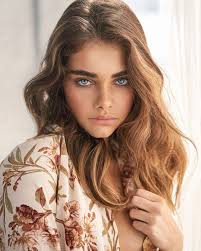

In [40]:
#Read Image
image = cv2.imread("images.jpg")
showImage(image)

####1. Transform the image in the +x direction by 25%, and create an image

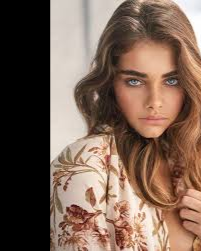

In [41]:
translate_percentage_x_dir = 25
transform_x(image, translate_percentage_x_dir)

####2. Transform the image in the +y direction by 25%, and create an image


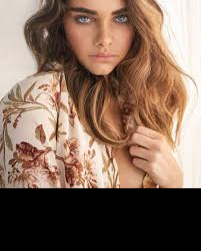

In [42]:
translate_percentage_y_dir = 25
transform_y(image, translate_percentage_y_dir)

####3. Rotate the image in Z by 90 degree


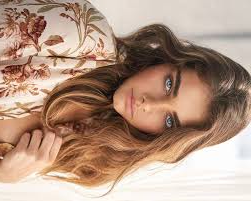

In [43]:
rotate90_clockwise(image)

####4. Rotate the image in Z by -90 degree


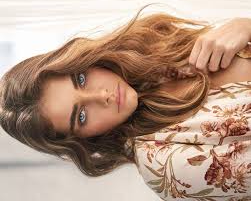

In [44]:
rotate90_anticlockwise(image)

####5. From the center of the image, in all directions, increase the RGB values of the pixels in a manner that, each pixel from the center, the percentage drops by 1%. i.e. the center pixel's RGB will increase by 50%, and the next pixels in x and y directions will be 49%. This goes on and on until the increase becomes 0 %.

Filter


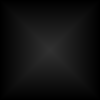

Result


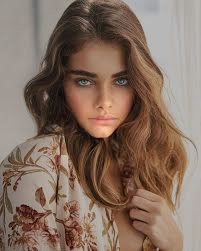

In [45]:
maximum_percentage = 50
apply_dist_transform(image, maximum_percentage)